# Cleaning in various ways (more cleaning)

In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_encoded = pd.read_csv("df_encoded.csv")

In [4]:
df_encoded.head()

,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,price,host_response,amenities_ratio,regions
0,6,2,7,1.0,2,1,0,1,6,93.0,3.0,3.0,169.0,1,0.194805,9
1,6,1,2,1.0,2,1,1,1,3,100.0,1.0,1.0,85.0,1,0.129870,6
2,4,2,2,1.0,1,1,1,0,9,93.0,1.0,1.0,120.0,1,0.337662,7
3,5,1,2,1.0,1,1,0,0,159,99.0,1.0,1.0,120.0,1,0.272727,6
4,6,1,2,1.0,2,1,1,0,82,93.0,1.0,1.0,100.0,1,0.194805,9


## Outliers

#### number_of_reviews

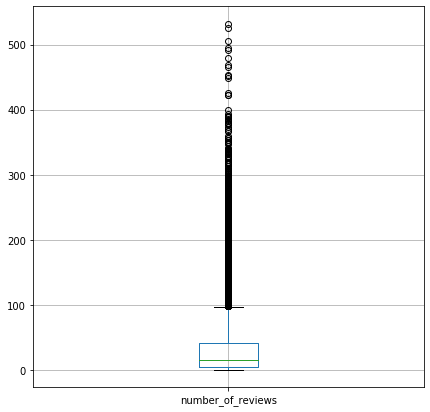

In [14]:
plt.figure(figsize=(7,7))
df_encoded.boxplot(column=['number_of_reviews']); #VERGA WE

In [23]:
q1=np.percentile(df_encoded.number_of_reviews, 25)
q3=np.percentile(df_encoded.number_of_reviews, 80)
iqr=q3-q1
q1,q3,iqr

(5.0, 52.0, 47.0)

In [44]:
upper=q3+2*iqr
upper

146.0

In [42]:
df_encoded[df_encoded.number_of_reviews<upper].shape, df_encoded.shape #Más de 800 outliers se van aquí

((27882, 16), (28877, 16))

In [45]:
df_encoded_clean1 = df_encoded[df_encoded.number_of_reviews<upper]

#### review_scores_rating

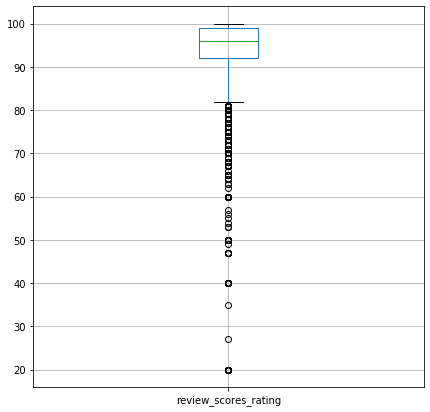

In [9]:
plt.figure(figsize=(7,7))
df_encoded.boxplot(column=['review_scores_rating']); #VERGA WE x2

In [69]:
q1=np.percentile(df_encoded.review_scores_rating, 10)
q3=np.percentile(df_encoded.review_scores_rating, 75)
iqr=q3-q1
q1,q3,iqr

(87.0, 99.0, 12.0)

In [73]:
lower=q1
lower

87.0

In [75]:
df_encoded_clean1[df_encoded_clean1.review_scores_rating>lower].shape, df_encoded_clean1.shape #Más de 3mil outliers se van aquí

((24736, 16), (27882, 16))

In [76]:
df_encoded_clean2 = df_encoded_clean1[df_encoded_clean1.review_scores_rating>lower]

#### accommodates

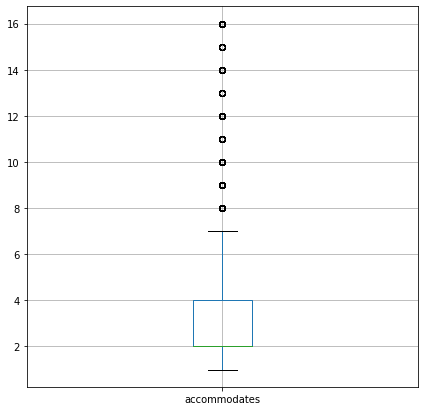

In [13]:
plt.figure(figsize=(7,7))
df_encoded.boxplot(column=['accommodates']); #VERGA WE x3

In [77]:
q1=np.percentile(df_encoded.accommodates, 25)
q3=np.percentile(df_encoded.accommodates, 75)
iqr=q3-q1
q1,q3,iqr

(2.0, 4.0, 2.0)

In [92]:
upper=q3+1.5*iqr
upper

7.0

In [93]:
df_encoded_clean2[df_encoded_clean2.accommodates<upper].shape, df_encoded_clean2.shape #Más de mil outliers SE VAN

((23200, 16), (24736, 16))

In [95]:
df_encoded_clean3 = df_encoded_clean2[df_encoded_clean2.accommodates<upper]

#### beds

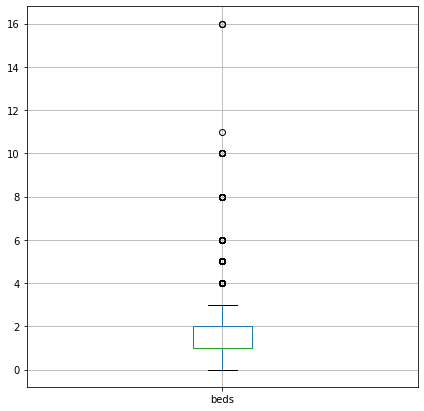

In [98]:
plt.figure(figsize=(7,7))
df_encoded_clean3.boxplot(column=['beds']); #VERGA WE x4

In [97]:
q1=np.percentile(df_encoded_clean3.beds, 25)
q3=np.percentile(df_encoded_clean3.beds, 75)
iqr=q3-q1
q1,q3,iqr

(1.0, 2.0, 1.0)

In [103]:
upper=q3+2*iqr
upper

4.0

In [104]:
df_encoded_clean3[df_encoded_clean3.beds<upper].shape, df_encoded_clean3.shape

((22429, 16), (23200, 16))

In [105]:
df_encoded_clean4=df_encoded_clean3[df_encoded_clean3.beds<upper]

#### bedrooms

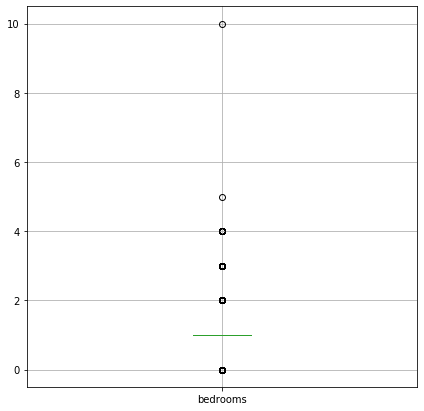

In [106]:
plt.figure(figsize=(7,7))
df_encoded_clean4.boxplot(column=['bedrooms']); #VERGA WE x5

In [110]:
q1=np.percentile(df_encoded_clean4.bedrooms, 25)
q3=np.percentile(df_encoded_clean4.bedrooms, 75)
iqr=q3-q1
q1,q3,iqr

(1.0, 1.0, 0.0)

In [121]:
upper=3 #Al tanteo, viendo el boxplot

In [123]:
df_encoded_clean4[df_encoded_clean4.bedrooms<upper].shape, df_encoded_clean4.shape

((21885, 16), (22429, 16))

In [125]:
df_encoded_clean5= df_encoded_clean4[df_encoded_clean4.bedrooms<upper]

In [126]:
#df_encoded_clean5.to_csv("df_encoded_woutliers.csv")